In [1]:
#Import the packages needed.
import torch
import torchvision
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from torchvision.transforms import ToTensor

data_train = torchvision.datasets.MNIST('./data',
        download=True,train=True,transform=ToTensor())
data_test = torchvision.datasets.MNIST('./data',
        download=True,train=False,transform=ToTensor())

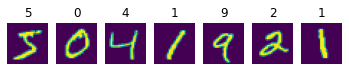

In [3]:
fig,ax = plt.subplots(1,7)
for i in range(7):
    ax[i].imshow(data_train[i][0].view(28,28))
    ax[i].set_title(data_train[i][1])
    ax[i].axis('off')

In [4]:
print('Training samples:',len(data_train))
print('Test samples:',len(data_test))

print('Tensor size:',data_train[0][0].size())
print('First 10 digits are:', [data_train[i][1] for i in range(10)])

Training samples: 60000
Test samples: 10000
Tensor size: torch.Size([1, 28, 28])
First 10 digits are: [5, 0, 4, 1, 9, 2, 1, 3, 1, 4]


In [5]:
print('Min intensity value: ',data_train[0][0].min().item())
print('Max intensity value: ',data_train[0][0].max().item())

Min intensity value:  0.0
Max intensity value:  1.0


In [6]:
import torch
import torch.nn as nn
import torchvision
import matplotlib.pyplot as plt

import pytorchcv
from pytorchcv.model_provider import get_model

In [7]:
net = nn.Sequential(
        nn.Flatten(), 
        nn.Linear(784,10), # 784 inputs, 10 outputs
        nn.LogSoftmax())

In [8]:
from torchvision  import models

In [9]:
dir(models)

['AlexNet',
 'DenseNet',
 'EfficientNet',
 'GoogLeNet',
 'GoogLeNetOutputs',
 'Inception3',
 'InceptionOutputs',
 'MNASNet',
 'MobileNetV2',
 'MobileNetV3',
 'RegNet',
 'ResNet',
 'ShuffleNetV2',
 'SqueezeNet',
 'VGG',
 '_GoogLeNetOutputs',
 '_InceptionOutputs',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_utils',
 'alexnet',
 'densenet',
 'densenet121',
 'densenet161',
 'densenet169',
 'densenet201',
 'detection',
 'efficientnet',
 'efficientnet_b0',
 'efficientnet_b1',
 'efficientnet_b2',
 'efficientnet_b3',
 'efficientnet_b4',
 'efficientnet_b5',
 'efficientnet_b6',
 'efficientnet_b7',
 'feature_extraction',
 'googlenet',
 'inception',
 'inception_v3',
 'mnasnet',
 'mnasnet0_5',
 'mnasnet0_75',
 'mnasnet1_0',
 'mnasnet1_3',
 'mobilenet',
 'mobilenet_v2',
 'mobilenet_v3_large',
 'mobilenet_v3_small',
 'mobilenetv2',
 'mobilenetv3',
 'quantization',
 'regnet',
 'regnet_x_16gf',
 'regnet_x_1_6gf',
 're

In [10]:
print('Digit to be predicted: ',data_train[0][1])
torch.exp(net(data_train[0][0]))

Digit to be predicted:  5


/home/azureuser/miniconda3/envs/ml/lib/python3.7/site-packages/torch/nn/modules/container.py:141: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


tensor([[0.0697, 0.1141, 0.1283, 0.0905, 0.0968, 0.0797, 0.0798, 0.1225, 0.1063,
         0.1124]], grad_fn=<ExpBackward0>)

In [11]:
train_loader = torch.utils.data.DataLoader(data_train,batch_size=64)
test_loader = torch.utils.data.DataLoader(data_test,batch_size=64)

In [12]:
from keras.datasets import mnist

2022-02-02 17:17:39.665754: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-02 17:17:39.665825: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [13]:
(train_images,train_labels),(test_images,test_labels) = mnist.load_data()

In [14]:
train_images.shape

(60000, 28, 28)

In [15]:
len(train_labels)

60000

In [16]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [17]:
test_images.shape

(10000, 28, 28)

In [18]:
len(test_labels)

10000

In [19]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [20]:
from keras import models
from keras import layers

In [21]:
from keras import models
from keras import layers
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))


2022-02-02 17:17:54.335687: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-02-02 17:17:54.335745: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-02-02 17:17:54.335792: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ravi): /proc/driver/nvidia/version does not exist
2022-02-02 17:17:54.336145: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [22]:
network.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

In [23]:
# preparing the image data
train_images = train_images.reshape((60000,28*28))
train_images = train_images.astype('float32')/255
test_images = test_images.reshape((10000,28*28))
test_images = test_images.astype('float32')/255

In [24]:
from tensorflow.keras.utils import to_categorical
# categorical encode the labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [25]:
# fit the model
network.fit(train_images, train_labels, epochs=5, batch_size=128)


Epoch 1/5
469/469 [==============================] - 6s 10ms/step - loss: 0.2565 - accuracy: 0.9253
Epoch 2/5
469/469 [==============================] - 5s 10ms/step - loss: 0.1033 - accuracy: 0.9693
Epoch 3/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0684 - accuracy: 0.9797
Epoch 4/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0501 - accuracy: 0.9850
Epoch 5/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0377 - accuracy: 0.9888


In [26]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:',test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0645 - accuracy: 0.9794
test_acc: 0.9793999791145325


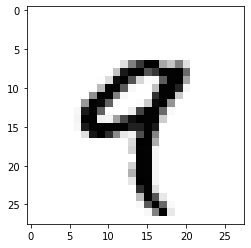

In [27]:
digit = train_images[4]
import matplotlib.pyplot as plt
plt.imshow(digit.reshape(28,28),cmap='Greys')
plt.show()


In [1]:
from keras.datasets import imdb
(train_data,train_labels),(test_data,test_labels) = imdb.load_data(num_words=10000)


In [2]:
train_labels[3]

1

In [3]:
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [4]:
# decode the review back to english
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decode_review = ' '.join([reverse_word_index.get(i-3,'?') for i in train_data[0]])


In [3]:
from keras.datasets import reuters
(train_data,train_labels),(test_data,test_labels) = reuters.load_data(num_words=10000)



2022-02-06 09:46:51.410304: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-06 09:46:51.410355: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [4]:
print(train_data[10])

[1, 245, 273, 207, 156, 53, 74, 160, 26, 14, 46, 296, 26, 39, 74, 2979, 3554, 14, 46, 4689, 4329, 86, 61, 3499, 4795, 14, 61, 451, 4329, 17, 12]


In [5]:
print(" len(train_data):",len(train_data))
print(" len(test_data):",len(test_data))
print(" len(train_labels):",len(train_labels))
print(" len(test_labels):",len(test_labels))

 len(train_data): 8982
 len(test_data): 2246
 len(train_labels): 8982
 len(test_labels): 2246


In [6]:
#decoding newswire back to text
word_index = reuters.get_word_index() # dictionary mapping words to an integer index
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()]) # dictionary mapping an integer index to a word
decode_review = ' '.join([reverse_word_index.get(i-3,'?') for i in train_data[0]]) # decode the review back to text

In [7]:
print(decode_review)

? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [8]:
#Encoding the data
import numpy as np
def vectorize_sequences(sequences,dimesion=10000):  #dimesion is the number of words in the dictionary
    results = np.zeros((len(sequences),dimesion))  #creates a matrix of zeros with the size of the number of sequences and the dimesion
    for i,sequence in enumerate(sequences):  #iterates through the sequences
        results[i,sequence] = 1. #sets the index of the sequence to 1
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [9]:
# vectorize the labels  (one hot encoding)
def to_one_hot(labels,dimension=46):
    results = np.zeros((len(labels),dimension))
    for i,label in enumerate(labels):
        results[i,label] = 1.
    return results
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)    


In [10]:
# keras bulit encoding one hot 
from keras.utils.np_utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [11]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))


2022-02-06 09:47:36.488331: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-02-06 09:47:36.488376: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-02-06 09:47:36.488408: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ravi): /proc/driver/nvidia/version does not exist
2022-02-06 09:47:36.488648: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [12]:
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

In [13]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [14]:
history = model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val,y_val))

Epoch 1/20
16/16 [==============================] - 3s 104ms/step - loss: 2.6137 - accuracy: 0.5078 - val_loss: 1.7277 - val_accuracy: 0.6250
Epoch 2/20
16/16 [==============================] - 1s 60ms/step - loss: 1.4255 - accuracy: 0.7018 - val_loss: 1.3337 - val_accuracy: 0.7150
Epoch 3/20
16/16 [==============================] - 1s 61ms/step - loss: 1.0540 - accuracy: 0.7785 - val_loss: 1.1388 - val_accuracy: 0.7490
Epoch 4/20
16/16 [==============================] - 1s 59ms/step - loss: 0.8170 - accuracy: 0.8267 - val_loss: 1.0303 - val_accuracy: 0.7870
Epoch 5/20
16/16 [==============================] - 2s 101ms/step - loss: 0.6432 - accuracy: 0.8670 - val_loss: 0.9738 - val_accuracy: 0.7960
Epoch 6/20
16/16 [==============================] - 1s 52ms/step - loss: 0.5142 - accuracy: 0.8941 - val_loss: 0.9338 - val_accuracy: 0.8060
Epoch 7/20
16/16 [==============================] - 1s 55ms/step - loss: 0.4144 - accuracy: 0.9153 - val_loss: 0.9167 - val_accuracy: 0.8070
Epoch 8/20


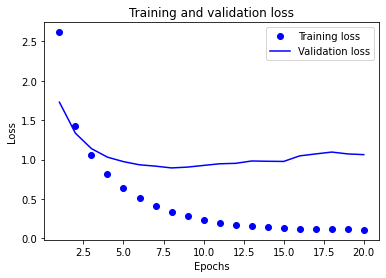

In [15]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(loss)+1)
plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


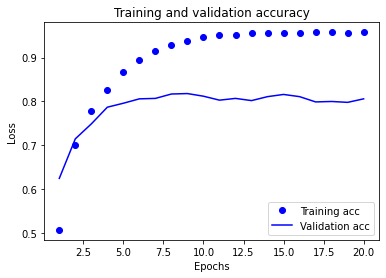

In [16]:
#plotting the training and validation accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [17]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
model.fit(partial_x_train,
partial_y_train,
epochs=9,
batch_size=512,
validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 2s 69ms/step - loss: 2.6988 - accuracy: 0.4604 - val_loss: 1.8117 - val_accuracy: 0.6410
Epoch 2/9
16/16 [==============================] - 1s 55ms/step - loss: 1.4794 - accuracy: 0.6971 - val_loss: 1.3237 - val_accuracy: 0.7230
Epoch 3/9
16/16 [==============================] - 1s 55ms/step - loss: 1.0688 - accuracy: 0.7780 - val_loss: 1.1503 - val_accuracy: 0.7650
Epoch 4/9
16/16 [==============================] - 1s 55ms/step - loss: 0.8214 - accuracy: 0.8340 - val_loss: 1.0187 - val_accuracy: 0.7950
Epoch 5/9
16/16 [==============================] - 1s 58ms/step - loss: 0.6499 - accuracy: 0.8703 - val_loss: 0.9710 - val_accuracy: 0.7920
Epoch 6/9
16/16 [==============================] - 1s 61ms/step - loss: 0.5151 - accuracy: 0.8949 - val_loss: 0.9626 - val_accuracy: 0.8010
Epoch 7/9
16/16 [==============================] - 1s 58ms/step - loss: 0.4181 - accuracy: 0.9141 - val_loss: 0.9064 - val_accuracy: 0.8200
Epoch 8/9
16/16 [===

In [18]:
results = model.evaluate(x_test,one_hot_test_labels)

71/71 [==============================] - 0s 3ms/step - loss: 1.0030 - accuracy: 0.7898


In [19]:
results

[1.0029972791671753, 0.7898486256599426]

In [20]:
import copy  #copy the model
test_labels_copy = copy.copy(test_labels) #copy the labels
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array))/len(test_labels)


0.188780053428317

In [21]:
predictions = model.predict(x_test)

In [22]:
predictions[0].shape

(46,)

In [23]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [24]:
model.compile(optimizer='rmsprop',
loss='sparse_categorical_crossentropy',
metrics=['acc'])

In [30]:
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))

model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=128,
validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 2s 30ms/step - loss: 1.5982 - accuracy: 0.6797 - val_loss: 1.0497 - val_accuracy: 0.7780
Epoch 2/20
63/63 [==============================] - 2s 31ms/step - loss: 0.7408 - accuracy: 0.8453 - val_loss: 0.8775 - val_accuracy: 0.8070
Epoch 3/20
63/63 [==============================] - 2s 29ms/step - loss: 0.4602 - accuracy: 0.9060 - val_loss: 0.8004 - val_accuracy: 0.8240
Epoch 4/20
63/63 [==============================] - 2s 29ms/step - loss: 0.3113 - accuracy: 0.9302 - val_loss: 0.7928 - val_accuracy: 0.8280
Epoch 5/20
63/63 [==============================] - 2s 31ms/step - loss: 0.2359 - accuracy: 0.9436 - val_loss: 0.8287 - val_accuracy: 0.8160
Epoch 6/20
63/63 [==============================] - 2s 32ms/step - loss: 0.1948 - accuracy: 0.9510 - val_loss: 0.8458 - val_accuracy: 0.8210
Epoch 7/20
63/63 [==============================] - 2s 30ms/step - loss: 0.1683 - accuracy: 0.9540 - val_loss: 0.8840 - val_accuracy: 0.8230
Epoch 8/20
63

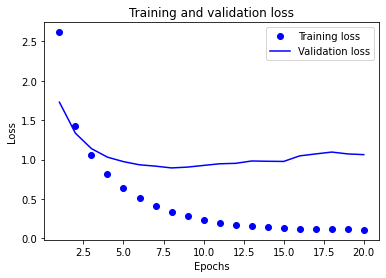

In [31]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

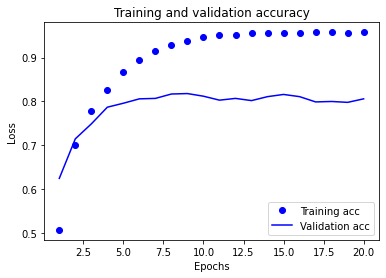

In [33]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [36]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)
val_labels = y_train[:1000]
y_val = np.array(val_labels)